  **Machine Learning Tugas Besar Tahap 1**
> Unsupervised Learning 


*  Clustering 


    Mayang Sari (1301194227) IF-43-05
    Deskripsi:
    Mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label kelas 
    apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak.


# Start

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy

In [ ]:
# get the csv files
!gdown --id 1pJ8aETdr5Ov4DKGjg0NZHzD4ZwlJ2zYX
!gdown --id 19xklr09pmLoSw8SL-qMg9pINIGNLuTnc

Downloading...
From: https://drive.google.com/uc?id=1pJ8aETdr5Ov4DKGjg0NZHzD4ZwlJ2zYX
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 41.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=19xklr09pmLoSw8SL-qMg9pINIGNLuTnc
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 36.5MB/s]


In [ ]:
# read the files
df_train = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test.csv')

# concat the files
concat = pd.concat([df_train, df_test])

df = concat.drop(columns=['id', 'Tertarik'])

# Data Exploration and Preparation

In [ ]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


In [ ]:
df.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
count,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000
mean,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350
std,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000
50%,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000
75%,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


In [ ]:
df.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333470 entries, 0 to 47638
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      319030 non-null  object 
 1   Umur               319256 non-null  float64
 2   SIM                319066 non-null  float64
 3   Kode_Daerah        319164 non-null  float64
 4   Sudah_Asuransi     319241 non-null  float64
 5   Umur_Kendaraan     319195 non-null  object 
 6   Kendaraan_Rusak    319282 non-null  object 
 7   Premi              318901 non-null  float64
 8   Kanal_Penjualan    319171 non-null  float64
 9   Lama_Berlangganan  319478 non-null  float64
dtypes: float64(7), object(3)
memory usage: 28.0+ MB


In [ ]:
# fill NaN values
# data numerik replace with mean
df[['Umur','SIM','Kode_Daerah','Sudah_Asuransi','Premi','Kanal_Penjualan',
    'Lama_Berlangganan']] = df[['Umur','SIM','Kode_Daerah','Sudah_Asuransi','Premi','Kanal_Penjualan',
    'Lama_Berlangganan']].fillna(value=df[['Umur','SIM','Kode_Daerah','Sudah_Asuransi','Premi','Kanal_Penjualan',
    'Lama_Berlangganan']].mean())

# data nominal dan ordinal direplace dengan nilai modus
df['Jenis_Kelamin'].fillna(df['Jenis_Kelamin'].mode()[0], inplace=True)
df['Umur_Kendaraan'].fillna(df['Umur_Kendaraan'].mode()[0], inplace=True)
df['Kendaraan_Rusak'].fillna(df['Kendaraan_Rusak'].mode()[0], inplace=True)

print('Check null after update:')
df.isna().sum()

Check null after update:


Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
# change object dtype to float or int, kategorikal
# jenis kelamin dan kendaraan rusak = nominal, umur kendaraan = ordinal
le = LabelEncoder()
df['Jenis_Kelamin'] = le.fit_transform(df['Jenis_Kelamin'])
df['Umur_Kendaraan'] = le.fit_transform(df['Umur_Kendaraan'])
df['Kendaraan_Rusak'] = le.fit_transform(df['Kendaraan_Rusak'])
df.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.000000,33.0,1.0,1,1,28029.0,152.0,97.0
1,0,48.0,1.000000,39.0,0.0,2,0,25800.0,29.0,158.0
2,0,21.0,1.000000,46.0,1.0,1,1,32733.0,160.0,119.0
3,1,58.0,1.000000,48.0,0.0,0,1,2630.0,124.0,63.0
4,0,50.0,1.000000,35.0,0.0,2,0,34857.0,88.0,194.0
5,0,21.0,1.000000,35.0,1.0,1,1,22735.0,152.0,171.0
6,1,33.0,1.000000,8.0,0.0,0,0,32435.0,124.0,215.0
7,0,23.0,0.997859,28.0,1.0,1,1,26869.0,152.0,222.0
8,1,20.0,1.000000,8.0,1.0,1,1,30786.0,160.0,31.0
9,0,54.0,1.000000,29.0,0.0,2,0,88883.0,124.0,28.0


In [ ]:
df.shape

(333470, 10)

In [ ]:
df.duplicated().sum()

299

In [ ]:
# drop duplicated data
df = df.drop_duplicates()
print("Data after dropping duplicate")
df.duplicated().sum()

Data after dropping duplicate


0

In [ ]:
print('Data shape after dropping data')
df.shape

Data shape after dropping data


(333171, 10)

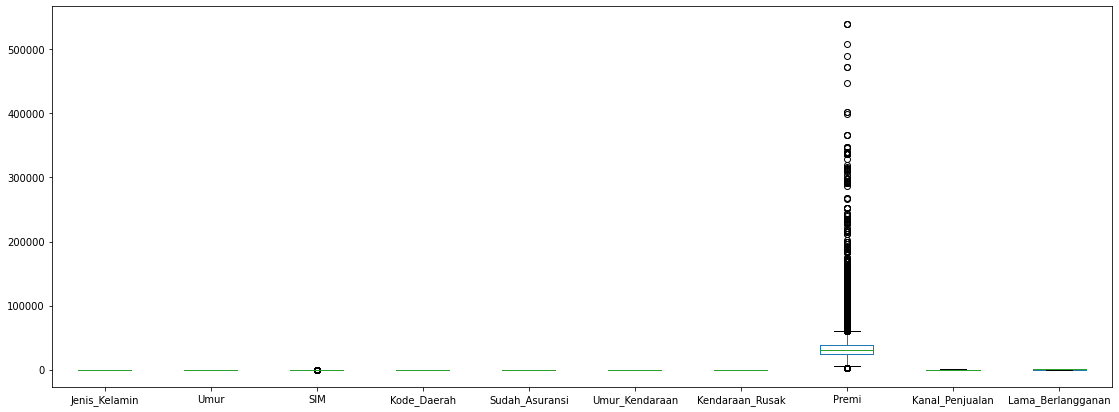

In [ ]:
# check outliers
df.plot(kind='box', figsize=(19,7))

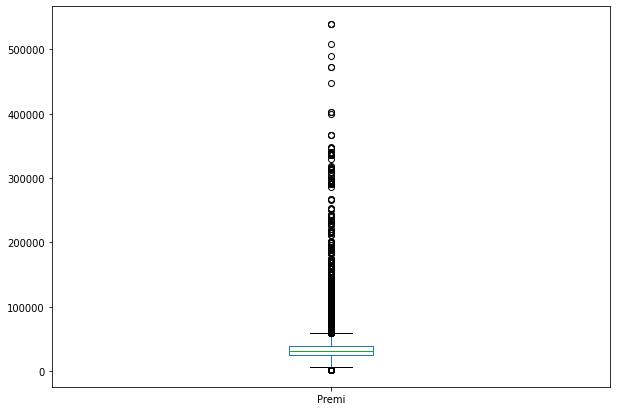

In [ ]:
df['Premi'].plot(kind='box', figsize=(10,7))

In [ ]:
# check and remove outliers
p25 = df['Premi'].quantile(0.25)
p75 = df['Premi'].quantile(0.75) # atas
iqr = p75 - p25
upper_bound = p75 + 1.5 * iqr
lowq_bound = p25 - 1.5 * iqr
# finding outliers
df[df['Premi'] > upper_bound]
df[df['Premi'] < lowq_bound]
# trimming
new_df = df[df['Premi'] < upper_bound]
# capping
new_df_cap = df.copy()
new_df_cap['Premi'] = np.where(new_df_cap['Premi'] > upper_bound,
                               upper_bound, np.where(new_df_cap['Premi'] < lowq_bound,
                                                     lowq_bound, new_df_cap['Premi']))
# print(lowq_bound, upper_bound)
# df = df[~((df['Premi'] < lowq_bound) | (df['Premi'] > upper_bound))]


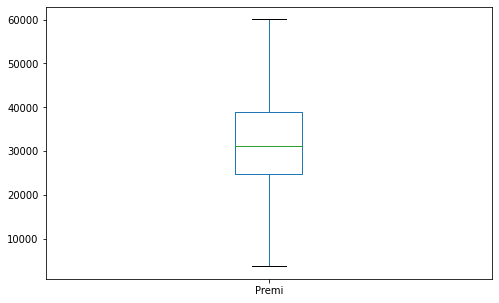

In [ ]:
new_df_cap['Premi'].plot(kind='box', figsize=(8,5))
# ax = sns.boxplot(data=df['Premi'], palette='Set3')

In [ ]:
df['Premi']

0        28029.0
1        25800.0
2        32733.0
3         2630.0
4        34857.0
          ...   
47634    31039.0
47635     2630.0
47636    33101.0
47637    37788.0
47638     2630.0
Name: Premi, Length: 333171, dtype: float64

In [ ]:
# normalization
def normalize(values):
    return (values - values.min())/(values.max() - values.min())
df = df.apply(normalize)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.047251,0.932099,0.301038
1,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.043104,0.172840,0.512111
2,0.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.056002,0.981481,0.377163
3,1.0,0.584615,1.0,0.923077,0.0,0.0,1.0,0.000000,0.759259,0.183391
4,0.0,0.461538,1.0,0.673077,0.0,1.0,0.0,0.059953,0.537037,0.636678
...,...,...,...,...,...,...,...,...,...,...
47634,0.0,0.630769,1.0,0.884615,0.0,1.0,0.0,0.052851,0.759259,0.197232
47635,0.0,0.323077,1.0,0.288462,0.0,0.0,0.0,0.000000,0.962963,0.768166
47636,0.0,0.061538,1.0,0.557692,1.0,0.5,1.0,0.056687,0.932099,0.695502
47637,0.0,0.600000,1.0,0.576923,0.0,0.0,0.0,0.065406,0.154321,0.792388


In [ ]:
# to csv : clean data
df.to_csv('kendaraan_clean.csv', index=False)

In [ ]:
corr = df.corr()
corr

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
Jenis_Kelamin,1.000000,-0.136687,0.016738,-0.000181,0.077197,0.105872,0.083889,-0.004575,0.105949,0.002081
Umur,-0.136687,1.000000,-0.075909,0.041111,-0.243060,-0.492191,-0.250749,0.064310,-0.553484,-0.000236
SIM,0.016738,-0.075909,1.000000,-0.002304,0.014785,0.028069,0.015809,-0.010614,0.042211,-0.001609
Kode_Daerah,-0.000181,0.041111,-0.002304,1.000000,-0.023134,-0.026080,-0.026167,-0.010581,-0.040807,-0.003868
Sudah_Asuransi,0.077197,-0.243060,0.014785,-0.023134,1.000000,0.163139,0.773433,0.004571,0.210186,0.001864
Umur_Kendaraan,0.105872,-0.492191,0.028069,-0.026080,0.163139,1.000000,0.160371,0.021334,0.367204,0.002062
Kendaraan_Rusak,0.083889,-0.250749,0.015809,-0.026167,0.773433,0.160371,1.000000,-0.008817,0.210398,0.000524
Premi,-0.004575,0.064310,-0.010614,-0.010581,0.004571,0.021334,-0.008817,1.000000,-0.109458,-0.001418
Kanal_Penjualan,0.105949,-0.553484,0.042211,-0.040807,0.210186,0.367204,0.210398,-0.109458,1.000000,0.000260
Lama_Berlangganan,0.002081,-0.000236,-0.001609,-0.003868,0.001864,0.002062,0.000524,-0.001418,0.000260,1.000000


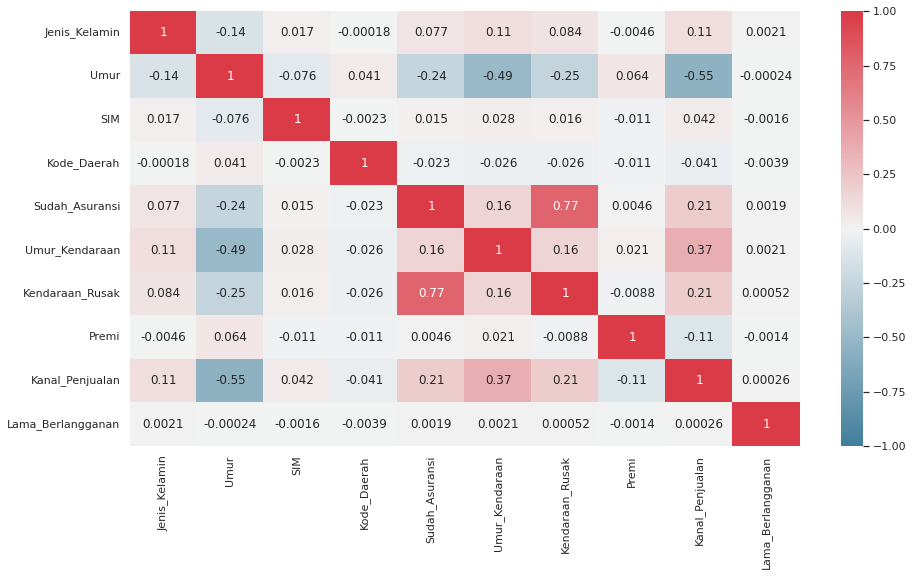

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
cmap = sns.diverging_palette(230, 10, as_cmap=True)
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap=cmap)

# Pemodelan

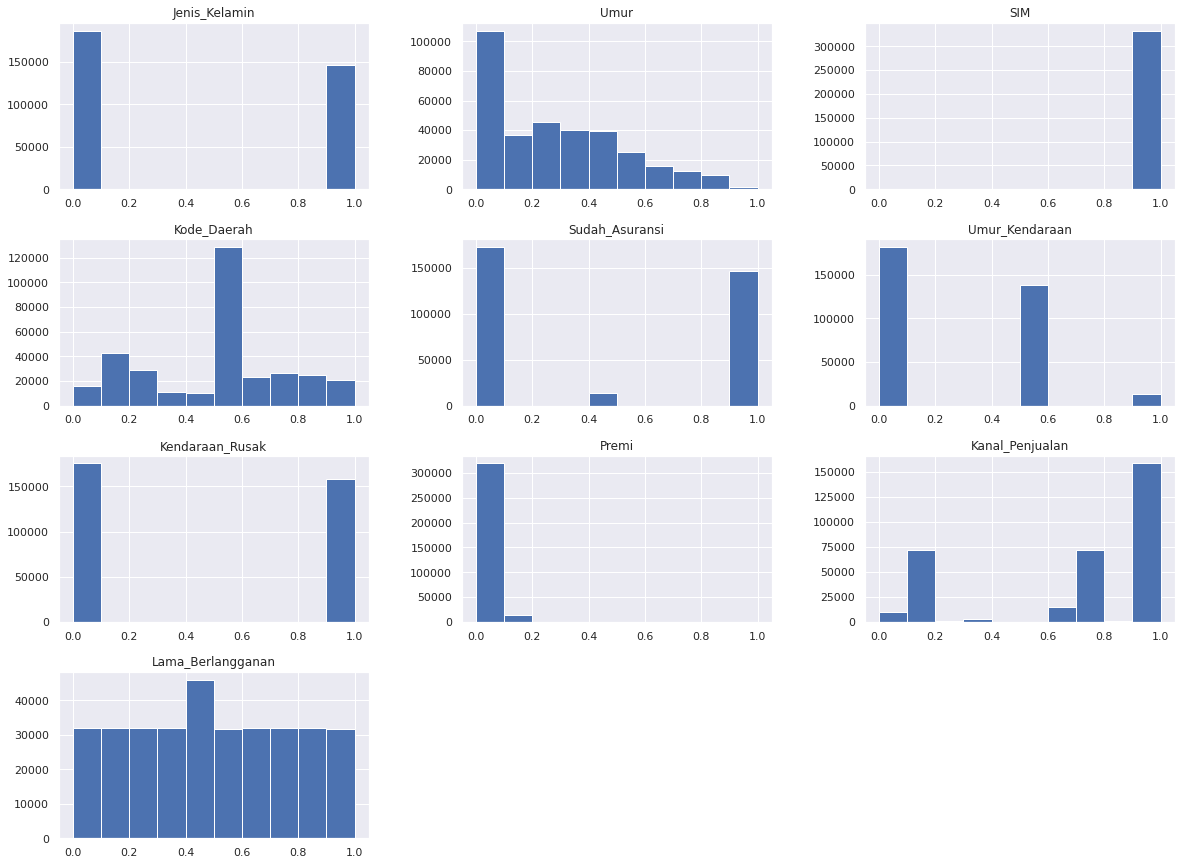

In [ ]:
df.hist(figsize=(20,15))

plt.show()

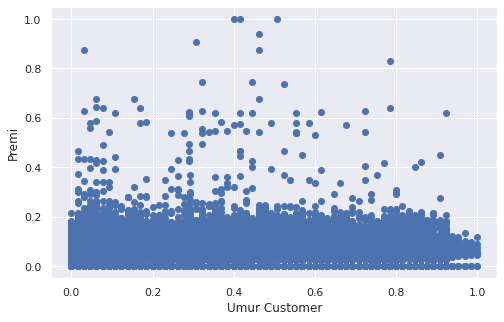

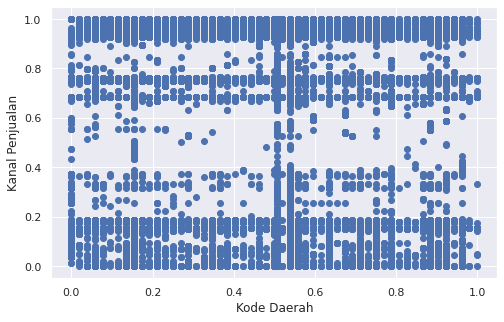

In [ ]:
# lihat persebaran data
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=df['Umur'], y=df['Premi'])
plt.xlabel("Umur Customer")
plt.ylabel("Premi")

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=df['Kode_Daerah'], y=df['Kanal_Penjualan'])
plt.xlabel("Kode Daerah")
plt.ylabel("Kanal Penjualan")
plt.show()

In [ ]:
def kmeans():
  # step 1: inisiasi centroid random dari data
  centroids = np.array([]).reshape(2,0)
  for i in range(K):
    rand = np.random.randint(0,m-1)
    centroids = np.c_[centroids, X[rand]]
  # step 2 : hitung jarak menggunakan eculidean dist
  Output = {}
  for n in range(max_iter): # ulangi sampai max iter atau titik centroid tidak bergerak lagi
    euclidean = np.array([]).reshape(m,0)
    for k in range(K):
      temp_euc = np.sqrt(np.sum((X - centroids[:,k])**2,axis=1))
      euclidean = np.c_[euclidean, temp_euc]
    # find closest cluster
    min = np.argmin(euclidean,axis=1)+1
    # regroup berdasarkan nilai min 
    temp = {}
    for k in range(K):
      temp[k+1] = np.array([]).reshape(2,0)
    for i in range(m):
      temp[min[i]] = np.c_[temp[min[i]], X[i]]
    for k in range(K):
      temp[k+1] = temp[k+1].T 
    for k in range(K):
      centroids[:,k] = np.mean(temp[k+1],axis=0)
    
    Output = temp
  # print(temp)
  # visualisasi
  plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
  plt.ylabel('Premi')
  plt.xlabel('Umur')
  plt.legend()
  plt.show()

  colors = ['cyan','lightgreen','orange','magenta']
  labels = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
  for k in range(K):
    plt.scatter(Output[k+1][:,0], Output[k+1][:,1], c = colors[k], label = labels[k])
  plt.scatter(centroids[0,:], centroids[1,:], s = 300, c='red', label = 'centroid', marker='*')
  plt.xlabel('Umur Customer')
  plt.ylabel('Premi')
  plt.show()

In [ ]:
# feature used 
X = df[['Umur', 'Premi']][:3000].values
print(X)

[[0.15384615 0.04725088]
 [0.43076923 0.04310417]
 [0.01538462 0.05600193]
 ...
 [0.76923077 0.        ]
 [0.49230769 0.09511009]
 [0.04615385 0.02098654]]


K = 2

m:  3000 
n:  2


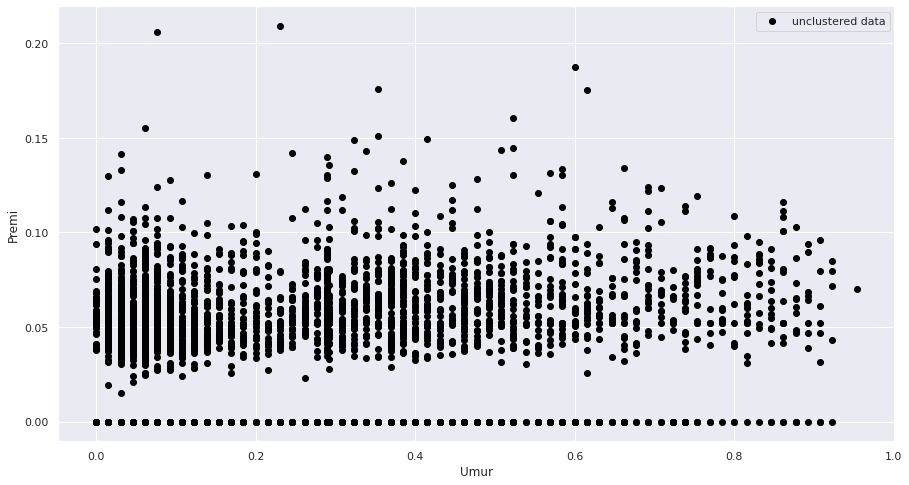

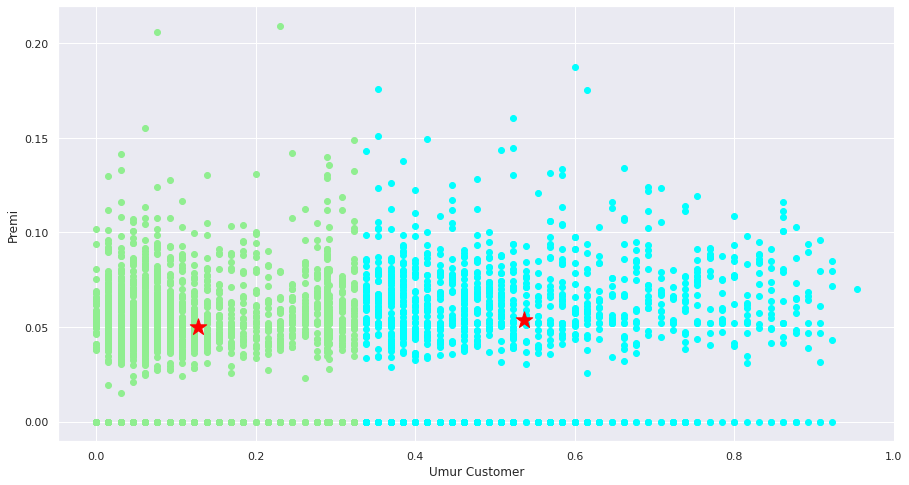

In [ ]:
m = X.shape[0] # baris
n = X.shape[1] # fitur yg digunakan
print('m: ',m,'\nn: ',n)
max_iter = 100
# choose number of clusters
K = 2
p = kmeans()

K = 3

m:  3000 
n:  2


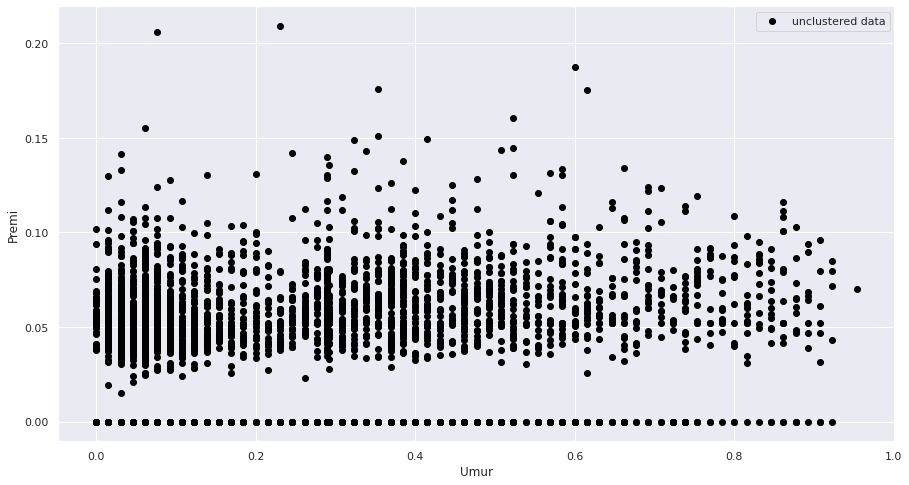

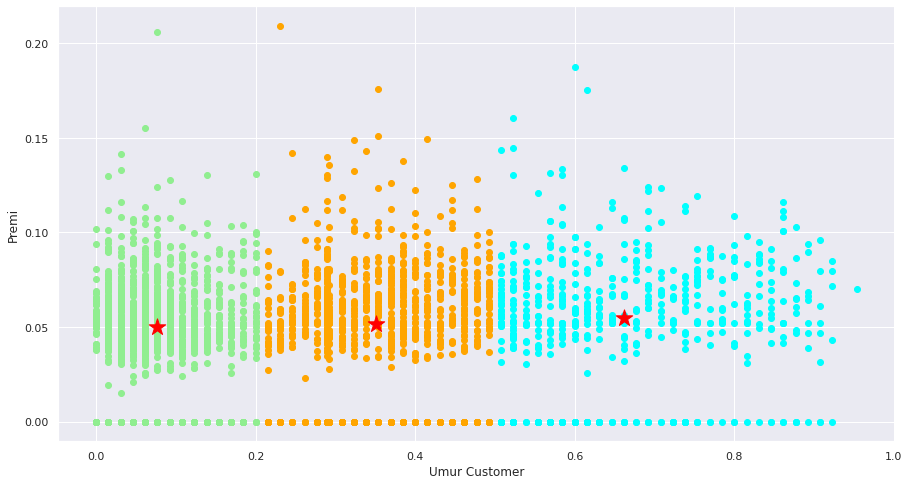

In [ ]:
m = X.shape[0] # baris
n = X.shape[1] # fitur yg digunakan
print('m: ',m,'\nn: ',n)
max_iter = 100
# choose number of clusters
K = 3
p = kmeans()

K = 4

m:  3000 
n:  2


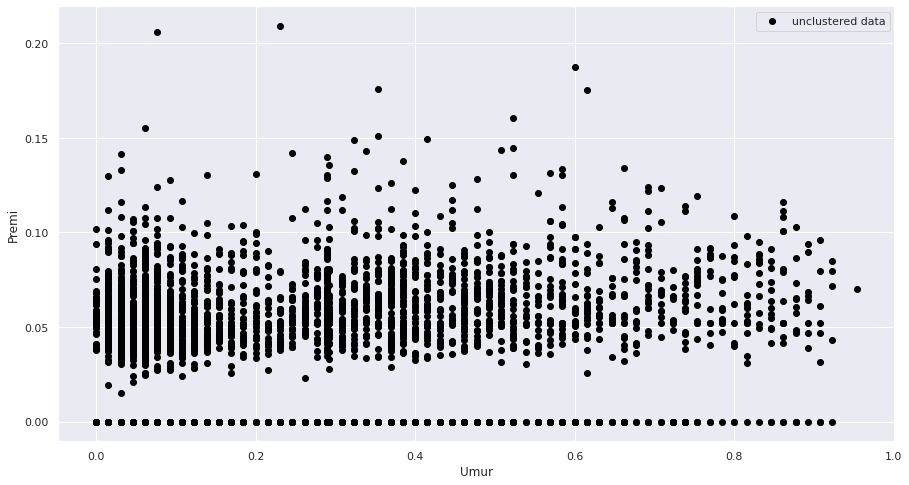

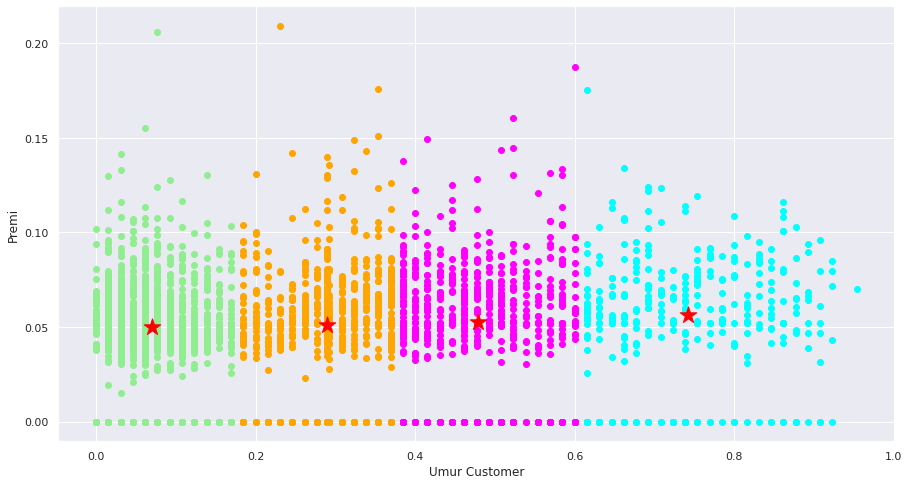

In [ ]:
m = X.shape[0] # baris
n = X.shape[1] # fitur yg digunakan
print('m: ',m,'\nn: ',n)
max_iter = 100
# choose number of clusters
K = 4
p = kmeans()

# Evaluasi 

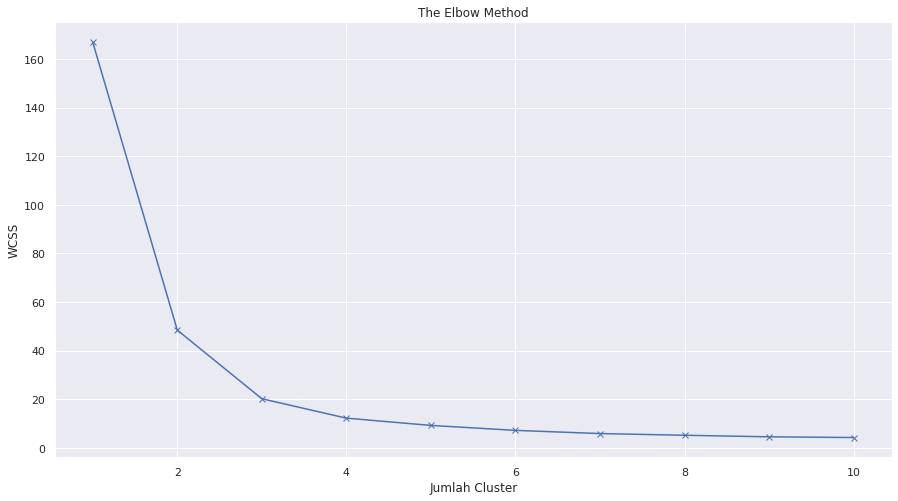

In [ ]:
# evaluasi best value for K, = 3
from sklearn.cluster import KMeans
wcss = []
for K in range(1,11):
  kmeans = KMeans(n_clusters = K, init = 'k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='x')
plt.title('The Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Eksperimen

Eksperimen (Kode Daerah, Kanal Penjualan)

In [ ]:
def kmeans():
  # step 1: inisiasi centroid random dari data
  centroids = np.array([]).reshape(2,0)
  for i in range(K):
    rand = np.random.randint(0,m-1)
    centroids = np.c_[centroids, X[rand]]
  # step 2 : hitung jarak menggunakan eculidean dist
  Output = {}
  for n in range(max_iter):
    euclidean = np.array([]).reshape(m,0)
    for k in range(K):
      temp_euc = np.sqrt(np.sum((X - centroids[:,k])**2,axis=1))
      euclidean = np.c_[euclidean, temp_euc]
    # find closest cluster
    min = np.argmin(euclidean,axis=1)+1
    # regroup berdasarkan nilai min 
    temp = {}
    for k in range(K):
      temp[k+1] = np.array([]).reshape(2,0)
    for i in range(m):
      temp[min[i]] = np.c_[temp[min[i]], X[i]]
    for k in range(K):
      temp[k+1] = temp[k+1].T 
    for k in range(K):
      centroids[:,k] = np.mean(temp[k+1],axis=0)
    
    Output = temp
  # print(temp)
  # visualisasi
  plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
  plt.ylabel('Kanal Penjualan')
  plt.xlabel('Kode Daerah')
  plt.legend()
  plt.show()

  colors = ['cyan','lightgreen','orange','magenta']
  labels = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
  for k in range(K):
    plt.scatter(Output[k+1][:,0], Output[k+1][:,1], c = colors[k], label = labels[k])
  plt.scatter(centroids[0,:], centroids[1,:], s = 300, c='red', label = 'centroid', marker='o')
  plt.xlabel('Kode Daerah')
  plt.ylabel('Kanal Penjualan')
  plt.show()

In [ ]:
# eksperimen fitur ke 2
# feature used : 1 = Umur, 7 = Premi
X = df[['Kode_Daerah', 'Kanal_Penjualan']][:3000].values
print(X)

[[0.63461538 0.93209877]
 [0.75       0.17283951]
 [0.88461538 0.98148148]
 ...
 [0.21153846 0.7345679 ]
 [0.50758424 0.15432099]
 [0.63461538 0.68546481]]


K = 2

m:  3000 
n:  2


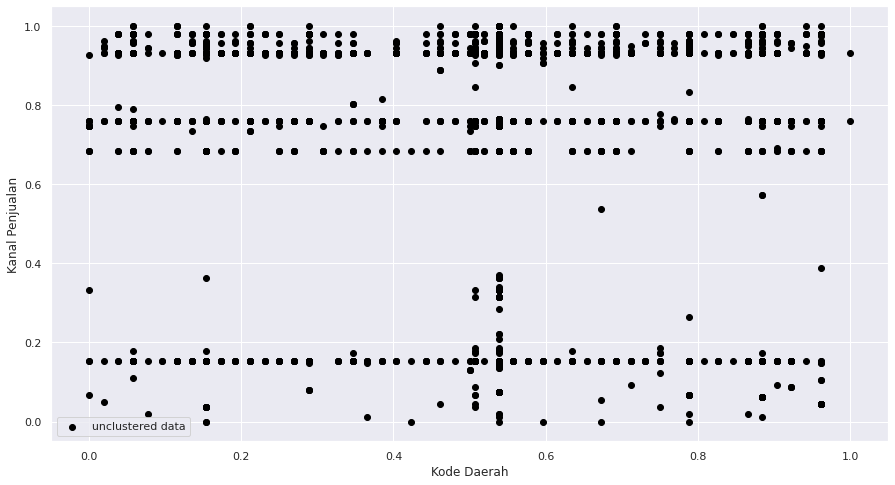

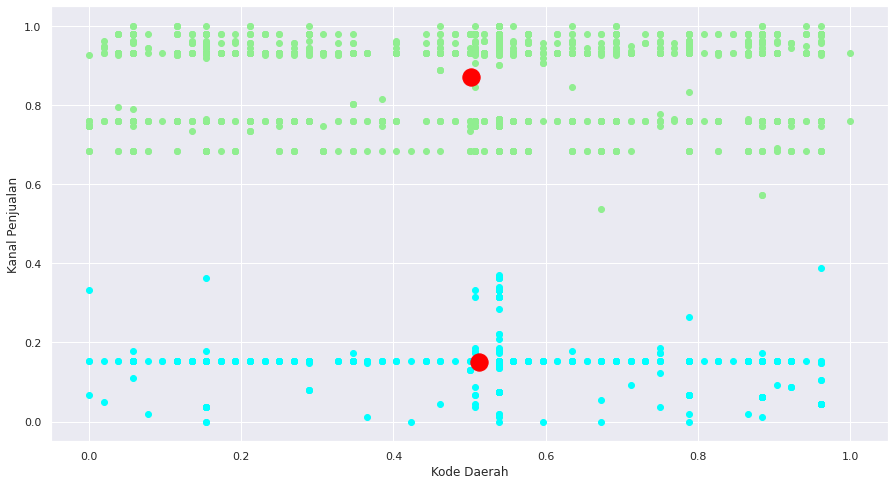

In [ ]:
m = X.shape[0] # baris
n = X.shape[1] # fitur yg digunakan
print('m: ',m,'\nn: ',n)
max_iter = 100
# choose number of clusters
K = 2
p = kmeans()

K = 3

m:  3000 
n:  2


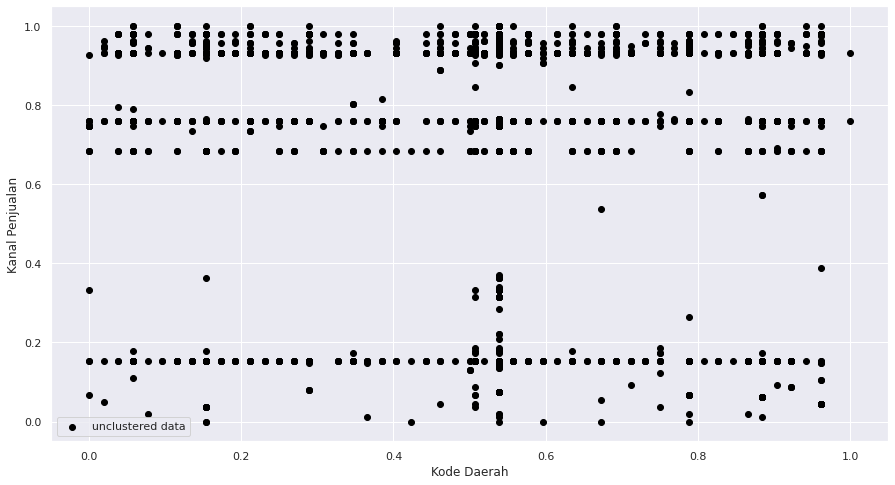

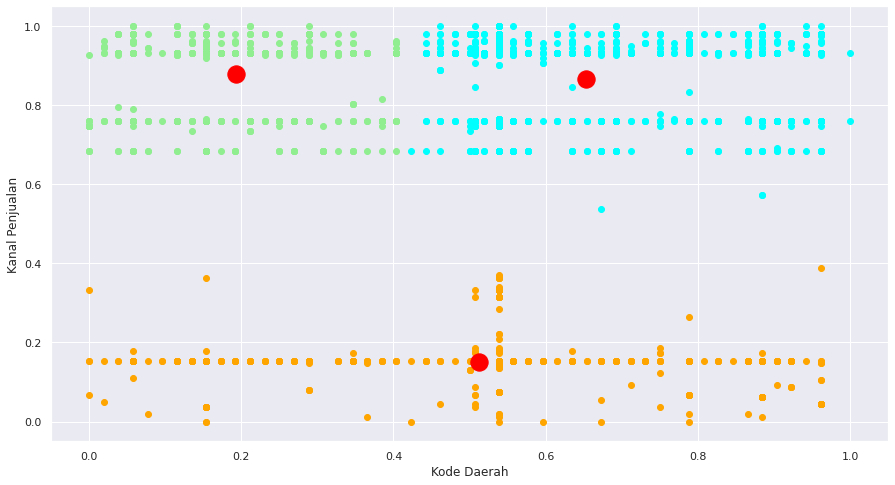

In [ ]:
m = X.shape[0] # baris
n = X.shape[1] # fitur yg digunakan
print('m: ',m,'\nn: ',n)
max_iter = 100
# choose number of clusters
K = 3
p = kmeans()

K = 4

m:  3000 
n:  2


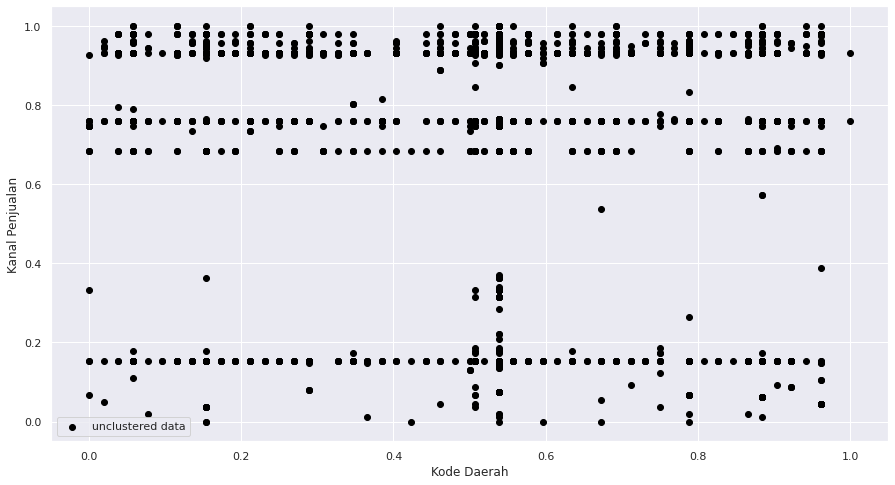

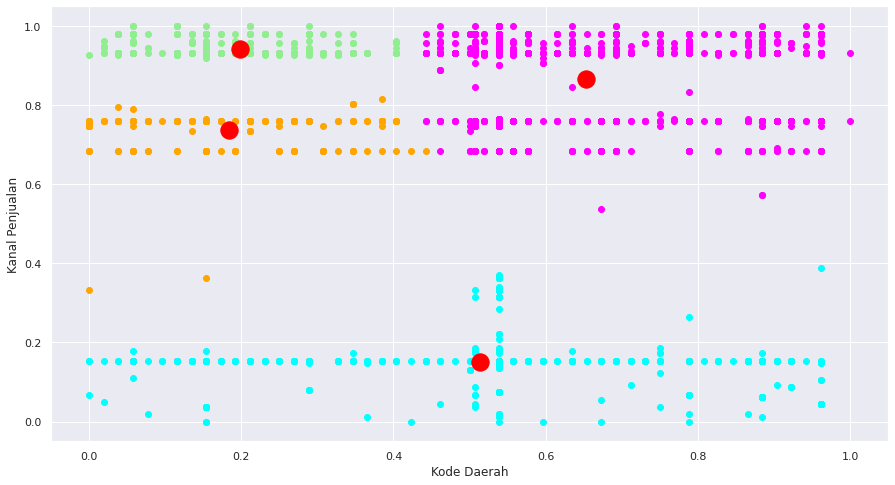

In [ ]:
m = X.shape[0] # baris
n = X.shape[1] # fitur yg digunakan
print('m: ',m,'\nn: ',n)
max_iter = 100
# choose number of clusters
K = 4
p = kmeans()

Evaluasi

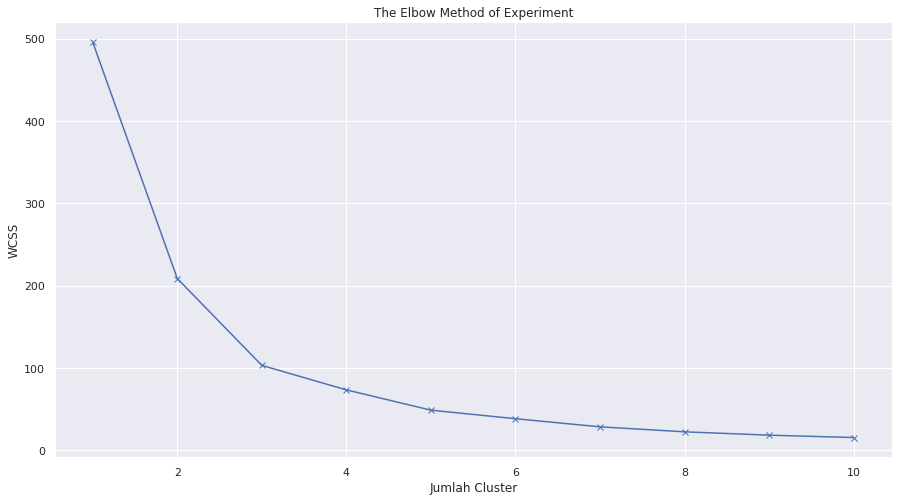

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for K in range(1,11):
  kmeans = KMeans(n_clusters = K, init = 'k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='x')
plt.title('The Elbow Method of Experiment')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()